In [1]:
import sys
sys.path.insert(0, "/home/brandm/Documents/Tesis/conflictmodel/conflictmodel")

In [2]:
import csv
import random

import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import numpy as np

import pandas as pd
import visualization as vzl

## Data Analysis

In [3]:
N = 100

In [4]:
# Replace 'data.txt' with the actual path to your .txt file.
file_path = '/home/brandm/Documents/Tesis/conflictmodel/conflictmodel/simulation_results.txt'

# Assuming the file is comma-separated (you can change the delimiter if needed).
df = pd.read_csv(file_path)

In [ ]:
grid = np.load('/home/brandm/Documents/Tesis/conflictmodel/conflictmodel/Obs100-c3-r50/grid.npy')

In [ ]:
matrix = np.load('/home/brandm/Documents/Tesis/conflictmodel/conflictmodel/Normal100-c3-r20/matrix.npy')

In [ ]:
vzl.plot_grid(grid)

In [ ]:
vzl.plot_commitment(matrix)

In [ ]:
df

In [ ]:
group_size = 33
df_years = df.groupby(df.index // group_size)

In [ ]:
wars_count = df_years['Status'].sum()

In [ ]:
mean_values = df_years.apply(lambda x: x.iloc[:, 5:].mean())

In [ ]:
wealth_year = mean_values.sum(axis=1)

In [ ]:
result_df = pd.DataFrame({'Wars': wars_count, 'Total_Capital': wealth_year})

In [ ]:
result_df

In [ ]:
group_years = 25
df_chunk = result_df.groupby(result_df.index // group_years)

In [ ]:
wars_chunk = df_chunk['Wars'].sum()
capital_chunk = df_chunk['Total_Capital'].mean()

In [ ]:
df_final = pd.DataFrame({'Wars': wars_chunk, 'Total_Capital': capital_chunk})

In [ ]:
df_final

In [ ]:
x = np.arange(25,1025,25)

In [ ]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(45, 15), facecolor='white')

# Plot column1 as bars
ax1.bar(df_final.index, df_final['Wars'], color='b', alpha=0.5, width=0.8)
ax1.set_ylabel('Fights each 25 years', color='b', fontsize=70)
ax1.set_xlabel("Year", fontsize=70)
ax1.tick_params('y', colors='b')
ax1.set_xticks(df_final.index)
ax1.set_xticklabels(x, rotation=45)

# Create a secondary y-axis for column2 as a line with a square marker
ax2 = ax1.twinx()
ax2.plot(df_final.index, df_final['Total_Capital'], 'go-', markersize=17, linewidth=6, label='Wealth')
ax2.set_ylabel('Total Wealth', color='g', fontsize=70)
ax2.tick_params('y', colors='g')

# Set the x-axis label and title
plt.xlabel('Years')
plt.title('Fights and Population Wealth', fontsize=70)

# Add grid and legends
#ax1.grid(True, linestyle='--', alpha=0.7)
#ax2.legend(loc='best',fontsize=45)

# Display the plot
plt.show()

## Conflict Sizes

In [5]:
filtered_df = df[df["Status"] == 1]

In [ ]:
filtered_df['Total']=filtered_df['Size Alpha'] + filtered_df['Size Tau']

In [ ]:
filtered_df

In [ ]:
size_target = filtered_df['Target'].tolist()

# Calculate the unique values and their respective frequencies
values_target, frequencies_target = np.unique(size_target, return_counts=True)
# Calculate the probability distribution

prob_distribution_target = frequencies_target / len(size_target)

In [ ]:
values_target

In [ ]:
means_total = df.iloc[:, 5:].mean()

In [ ]:
means_total[21]

In [ ]:
len(values_target)

In [ ]:
np.sort(frequencies_target)

In [ ]:
frequencies_target

In [ ]:
df_fractions = filtered_df.iloc[1:].div(filtered_df.shift(1))

In [ ]:
import matplotlib.pyplot as plt

def plot_frequencies(frequencies, x):
    # Create an array of indices to use as the x-axis


    # Plot the frequencies
    plt.loglog(x, frequencies, marker='o', linestyle=' ', color='b', label='Frequencies')

    # Set labels and title
    plt.xlabel('Index')
    plt.ylabel('Frequency')
    plt.title('Array of Frequencies')

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()



# Call the plotting function
plot_frequencies(frequencies_target, means_total)


In [ ]:
vzl.distibution_plot(values_target,np.sort(frequencies_target), 'd', N, 33, log_value = False)

In [ ]:
vzl.distibution_plot(values_target,frequencies_target, 'd', N, 3, log_value = False, ccdf = True)

### Defence coalition ($\tau$)

In [ ]:
N = 103

In [6]:
cycle = 3

In [ ]:
size_t = filtered_df['Size Alpha'].tolist()

# Calculate the unique values and their respective frequencies
values_t, frequencies_t = np.unique(size_t, return_counts=True)
# Calculate the probability distribution

prob_distribution_t = frequencies_t / len(size_t)

In [ ]:
vzl.distibution_plot(values_t,frequencies_t, 'd', N, cycle, log_value = True)

In [ ]:
vzl.distibution_plot(values_t[1:],prob_distribution_t[1:], 'd', N, cycle, log_value = True, ccdf = True)

### Attack coalition ($\alpha$)

In [ ]:
size_a = filtered_df['Size Tau'].tolist()

# Calculate the unique values and their respective frequencies
values_a, frequencies_a = np.unique(size_a, return_counts=True)
# Calculate the probability distribution

prob_distribution_a = frequencies_a / len(size_a)

In [ ]:
vzl.distibution_plot(values_a[1:],prob_distribution_a[1:], 'a', N, cycle, log_value = True)

In [ ]:
vzl.distibution_plot(values_a[1:],prob_distribution_a[1:], 'a', N, cycle, log_value = True, ccdf = True)

## Total

In [ ]:
all_df = filtered_df['Total'].tolist()

# Calculate the unique values and their respective frequencies
values_all, frequencies_all = np.unique(all_df, return_counts=True)
# Calculate the probability distribution

prob_distribution_all = frequencies_all / len(all_df)

In [ ]:
vzl.distibution_plot(values_all[1:],prob_distribution_all[1:], 't', N, cycle, log_value = True)

In [ ]:
vzl.distibution_plot(values_all[10:],prob_distribution_all[10:], 't', N, cycle, log_value = True, ccdf = True)

# Periods of peace

In [ ]:
import importlib
import visualization as vzl  # Replace 'my_module' with the name of the module you want to import again.

# Reloading the module
importlib.reload(vzl)


In [7]:
peace = df[df["Status"] != 1].groupby((df["Status"] == 1).cumsum()).size().tolist()

# Calculate the unique values and their respective frequencies
values_p, frequencies_p = np.unique(peace, return_counts=True)
# Calculate the probability frequencies
prob_frequencies_p = frequencies_p /len(peace)

In [8]:
def new_plot(x,y):
    plt.figure(figsize=(30, 10), facecolor='white')  # Adjust the values (width, height) as desired

    # Plot the probability distribution on a log-log scale with larger markers and a different color
    plt.loglog(x, y, marker='o', markersize=17, linestyle='', color='green', label='Data')

    log_sorted_values = np.log(x)
    log_prob_distribution = np.log(y)

    # Perform linear regression to estimate the slope
    slope, intercept, r_value, p_value, std_err = linregress(log_sorted_values, log_prob_distribution)

    # Create the line that represents the best fit with a thicker line and a different color
    line = slope * log_sorted_values + intercept
    plt.loglog(x, np.exp(line), color='red', linewidth=6, label=f'Slope: {slope:.2f}')

    # Set the labels and title of the plot with increased font size
    plt.xlabel("x", fontsize=50)
    plt.ylabel("P(x)", fontsize=50)
    plt.title("Peace Intervals - Obstacles", fontsize=50)

    # Add parameter information as a text annotation with increased font size
    params_info = f"N: {N}\nλ: {N//cycle}"
    plt.text(0.5, 0.95, params_info, fontsize=45, transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.8))

    # Increase the font size of the tick labels
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)

    # Increase the legend font size
    plt.legend(fontsize=45)

    # Show the plot
    plt.show()

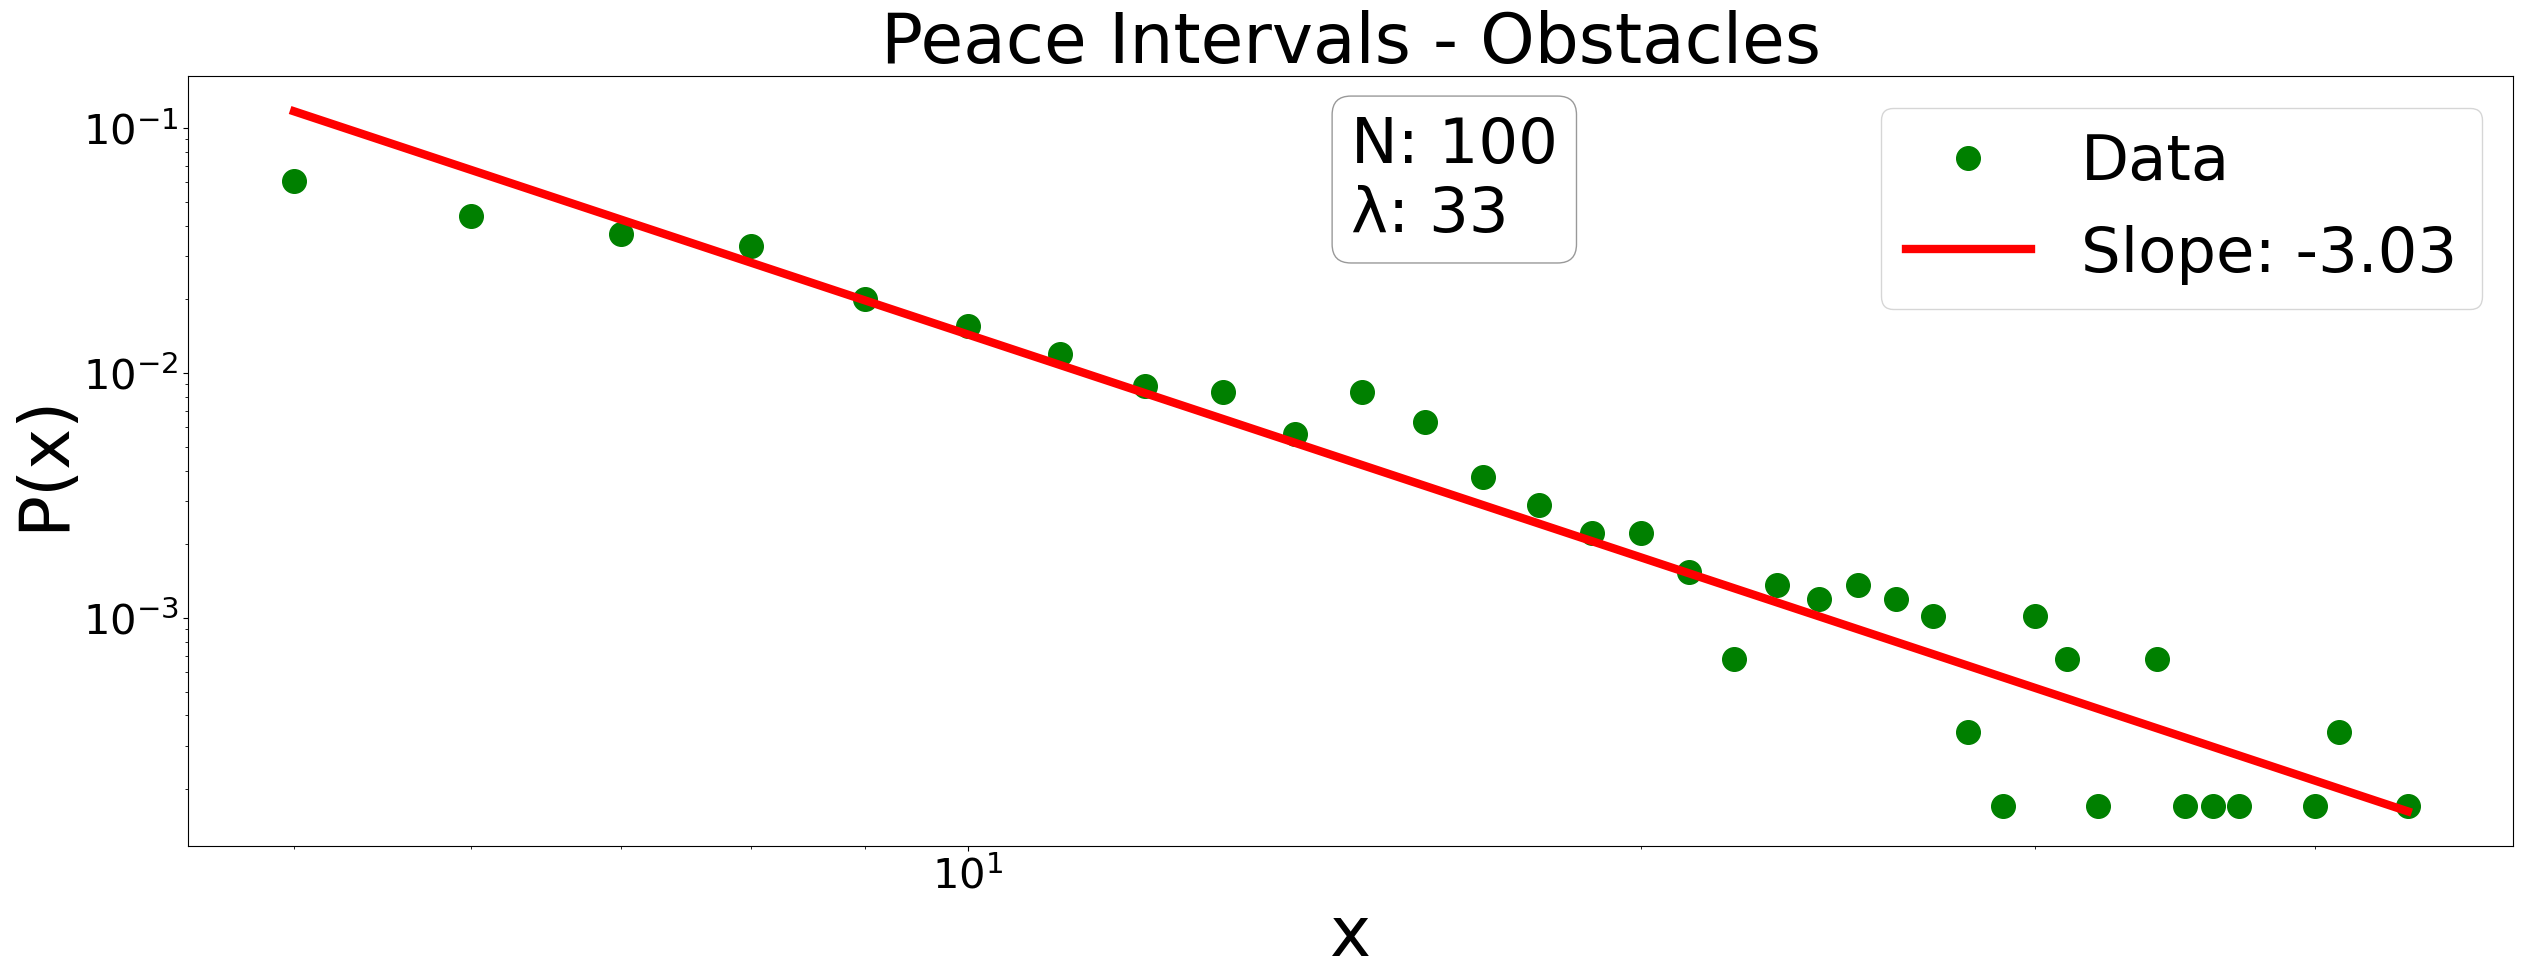

In [9]:
new_plot(values_p[4:],prob_frequencies_p[4:])

In [ ]:
vzl.distibution_plot(values_p[4:],prob_frequencies_p[4:], 'p', N, 3, log_value = True)

In [ ]:
vzl.distibution_plot(values_p[1:],prob_frequencies_p[1:], 'p', N, cycle, log_value = True, ccdf = True)

# Activity

In [ ]:
# Calculate the unique values and their respective frequencies
unique_values, frequencies = np.unique(df_grouped.round(8), return_counts=True)


# Calculate the total number of data points
total_data_points = len(df_grouped)

# Calculate the probability frequencies
prob_frequencies = frequencies / total_data_points

# Total loss

In [ ]:
# Calculate the unique participants and their respective counts
participants, counts = np.unique(df_grouped2.round(3), return_counts=True)

# Sort the unique participants in ascending order
participants_sorted = np.sort(participants)

# Calculate the cumulative frequencies
cumulative_freq = np.cumsum(counts) / np.sum(counts)

# Calculate the log of participants and cumulative frequencies
log_participants = np.log10(participants_sorted)
log_cumulative_freq = np.log10(cumulative_freq)

los edges acorde a Axelrod  diferente grosor

exponente en funcion alpha en funcion en el numero de activaciones por año ver que es el alpha y ver en que influye en enumero de conflictos por año o por que no se conserva la ley de potencia.
densidad de obstaculos, densidad de obstaculos = .


incrementar el numero de vecinos paulatinamente. 
